### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 2


### Дисциплина: Методы машинного обучения

##### Студент:  Шалыгин Георгий
##### Группа:   НФИ-02

## Москва 2023
***

### Вариант № 18

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимый признак и зависимый признак (отклик).

  Набор данных: forest_fires.

  Независимая переменная: features/FFMC.

  Зависимая переменная: features/temp 

In [ ]:
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
ds = tfds.load("forest_fires", split='train')
df = tfds.as_dataframe(ds)
df.info()

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            517 non-null    float32
 1   features/DC     517 non-null    float32
 2   features/DMC    517 non-null    float32
 3   features/FFMC   517 non-null    float32
 4   features/ISI    517 non-null    float32
 5   features/RH     517 non-null    float32
 6   features/X      517 non-null    uint8  
 7   features/Y      517 non-null    uint8  
 8   features/day    517 non-null    int64  
 9   features/month  517 non-null    int64  
 10  features/rain   517 non-null    float32
 11  features/temp   517 non-null    float32
 12  features/wind   517 non-null    float32
dtypes: float32(9), int64(2), uint8(2)
memory usage: 27.4 KB


In [9]:
#уберем выбросы
df = df[df['features/FFMC'] > 80]

2. Решите задачу полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронной сети с одним нейроном и оцените качество полученной модели по показателю, указанному в индивидуальном задании.
  
  Степень полинома: 3.
  
  Показатель качества регрессии – MSE (mean squared error) 

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [11]:
x = df['features/FFMC']
y = df['features/temp']

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3) 
X = poly.fit_transform(pd.DataFrame(x))
X

array([[1.0000000e+00, 9.6099998e+01, 9.2352100e+03, 8.8750369e+05],
       [1.0000000e+00, 9.0500000e+01, 8.1902500e+03, 7.4121762e+05],
       [1.0000000e+00, 9.4300003e+01, 8.8924902e+03, 8.3856188e+05],
       ...,
       [1.0000000e+00, 9.0000000e+01, 8.1000000e+03, 7.2900000e+05],
       [1.0000000e+00, 8.9400002e+01, 7.9923604e+03, 7.1451700e+05],
       [1.0000000e+00, 9.1599998e+01, 8.3905596e+03, 7.6857525e+05]],
      dtype=float32)

In [13]:
model = Sequential(Dense(1, input_shape=(4,)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
history0 = model.fit(X, y, epochs=100, verbose=1, validation_split = 0.2)

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 119379216.0000 - val_loss: 2973795.2500
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 20347816.0000 - val_loss: 17433640.0000
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 7491957.0000 - val_loss: 2487498.7500
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 1307519.6250 - val_loss: 829402.1875
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 565715.9375 - val_loss: 109466.6328
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 113819.5781 - val_loss: 126990.0703
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 42185.8945 - val_loss: 19586.4219
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 16434.4395 - val_loss: 2659.8562
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 7096.1226 - val_loss: 2907.7590
Epoch 10/100
13/

In [15]:
y_pred = model.predict(X)
y_pred = [x[0] for x in y_pred]
print(f'MSE = {np.sum((y-y_pred)**2) / len(y_pred)}')

16/16 [==============================] - 0s 1ms/step
MSE = 2947.633663366337


Как видно, модель обучилась до какого-то предела (локального минимума?).

3.	Постройте кривые обучения с зависимостью от количества эпох.

In [20]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, max(history.history['loss'])*0.5])
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(True)

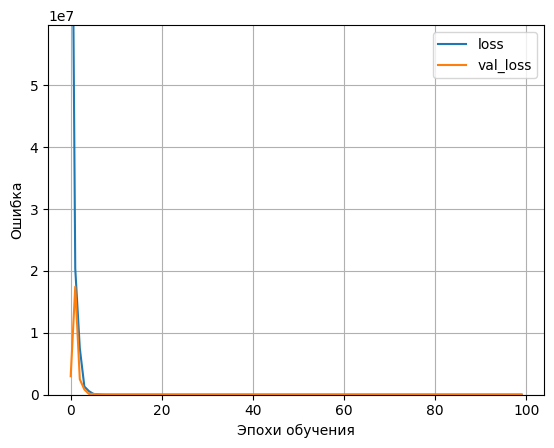

In [21]:
plot_loss(history0)

4. Визуализируйте точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линию регрессии (другим цветом), подписывая оси и рисунок.

In [23]:
x = np.array(x)
y_pred = np.array(y_pred)

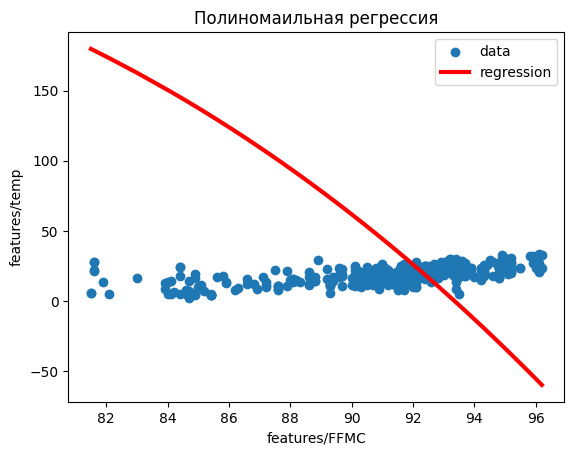

In [25]:
plt.scatter(x, y, label='data')
plt.plot(np.sort(x), y_pred[np.argsort(x)], c='r', lw=3, label='regression'); 
plt.xlabel('features/FFMC')
plt.ylabel('features/temp')
plt.title('Полиномаильная регрессия')
plt.legend()

ну, тут уж как поулчилось...

5. Определите в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и имеющий свойства, указанные в индивидуальном задании. Доп. признак: имеющий минимальную корреляцию с независимой переменной.

  area: 0.040062

In [26]:
# оставим непрерывные
df_new = df.drop(['features/X', 'features/Y', 'features/day', 'features/month'], axis=1)

In [27]:
np.abs(df_new.corrwith(df['features/FFMC']))

area             0.040062
features/DC      0.443239
features/DMC     0.490669
features/FFMC    1.000000
features/ISI     0.669626
features/RH      0.252776
features/rain    0.095590
features/temp    0.594506
features/wind    0.096956
dtype: float64

6. Визуализируйте этот признак в соответствии с индивидуальным заданием. Визуализация доп. признака – эмпирическая плотность распределения 

<Axes: title={'center': 'График эмпирической функции распределения признака area'}, xlabel='area', ylabel='ECDF(area)'>

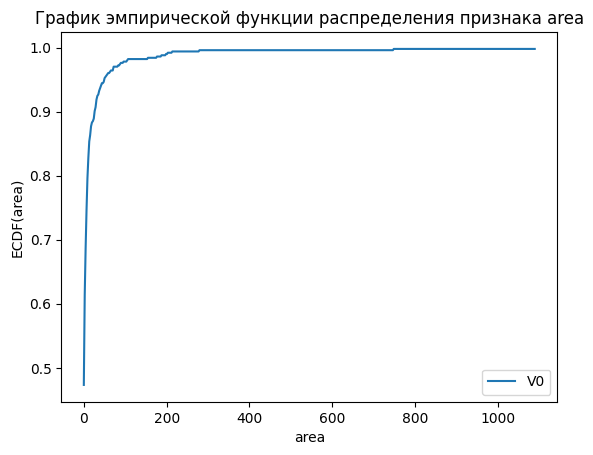

In [28]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

samples = df['area'] # sepal length
npoints = 500
dx = (samples.max()-samples.min())/npoints

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

df_ECDF = pd.DataFrame(ylist, columns=['V0'],index=xlist)
df_ECDF.plot.line(title='График эмпирической функции распределения признака area', xlabel='area', ylabel='ECDF(area)')


7. Сформируйте набор входных данных из двух признаков набора данных (независимый признак и определенный признак), создайте и адаптируйте нормализующий слой Tensorflow для двух признаков.

In [29]:
X = df[['features/FFMC', 'area']]
X.head()

,features/FFMC,area
0,96.099998,10.820000
1,90.500000,24.590000
2,94.300003,0.170000
3,96.099998,14.680000
4,92.900002,88.489998


In [30]:
df_normalizer = tf.keras.layers.Normalization()
df_normalizer.adapt(X)
print(df_normalizer.mean.numpy())
print(df_normalizer.variance.numpy())

[[91.26317  13.101703]]
[[   8.010956 4137.2344  ]]


8. Используя созданный нормализующий слой, постройте нейронную сеть (нелинейный регресор) с количеством скрытых слоев, количеством нейронов и функцией активации, указанными в индивидуальном задании, и одним нейроном в выходном слое и обучите ее на наборе данных из двух признаков и отклика.

  Параметры глубокой нейронной сети: кол-во скрытых слоев – 3, кол-во нейронов в скрытом слое – 128, функция активации – relu. 

In [31]:
model = Sequential([
    df_normalizer,
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='linear')
])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                5         
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33,542
Trainable params: 33,537
Non-trainable params: 5
__________________________________________________

In [33]:
model.compile(loss='mse')
history = model.fit(
    X, y,
    epochs=100,
    # уровень выводимой информации
    verbose=1,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)

Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 334.4527 - val_loss: 239.1641
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 147.4668 - val_loss: 223.0677
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 57.0400 - val_loss: 148.0962
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 40.2599 - val_loss: 151.7744
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 31.9360 - val_loss: 126.1093
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 27.2951 - val_loss: 90.8178
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 24.0217 - val_loss: 81.8294
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 22.9604 - val_loss: 74.8228
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 22.1009 - val_loss: 76.2802
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 22.2750 -

Качество заметно лучше, чем в первом варианте

9. Визуализируйте набор данных в виде точечного графика и прогноз нейронной сети в виде поверхности в трехмерном пространстве.

In [34]:
y_pred = model.predict(X)

16/16 [==============================] - 0s 2ms/step


In [35]:
y_pred = [x[0] for x in y_pred]

In [36]:
X = np.array(X)
X

array([[96.1 , 10.82],
       [90.5 , 24.59],
       [94.3 ,  0.17],
       ...,
       [90.  ,  0.  ],
       [89.4 ,  0.  ],
       [91.6 , 42.87]], dtype=float32)

In [40]:
n_plot = 51

x_plot = np.linspace(np.min(xs), np.max(xs), n_plot) 
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)

x_plot, y_plot = np.meshgrid(x_plot, y_plot)

In [41]:
x_plot2 = np.reshape(x_plot, [n_plot**2,1])
y_plot2 = np.reshape(y_plot, [n_plot**2,1])
xy_2 = np.hstack([x_plot2, y_plot2])
xy_2.shape

(2601, 2)

In [43]:
z = model.predict(xy_2)
z.shape

82/82 [==============================] - 0s 1ms/step


(2601, 1)

In [46]:
z_plot = z.reshape((n_plot, n_plot))


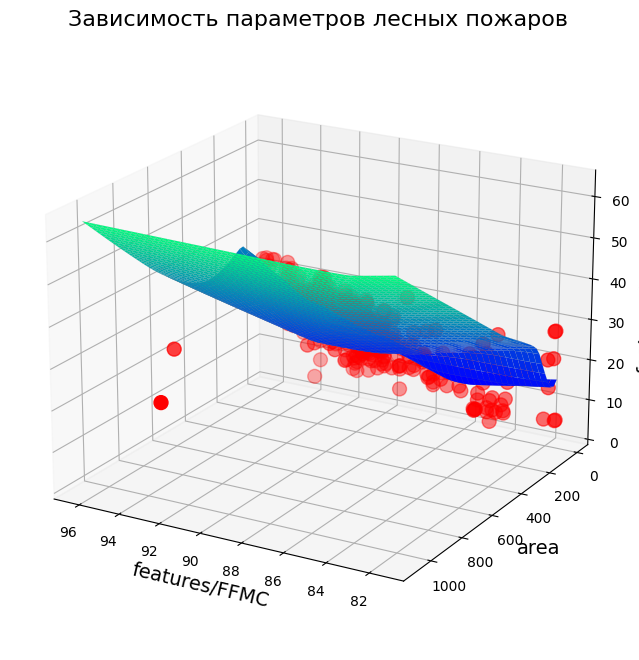

In [52]:
from matplotlib import cm

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_plot, y_plot, z_plot, \
       rstride=1, cstride=1, linewidth=0.05, cmap=cm.winter, antialiased=True, \
       edgecolors='gray') 
ax.scatter( xs, ys, zs, s=100, c='r' )

ax.set_xlabel('features/FFMC', fontsize=14) 
ax.set_ylabel('area', fontsize=14)
ax.set_zlabel('features/temp', fontsize=14) 
ax.set_title('Зависимость параметров лесных пожаров', fontsize=16)

ax.set_zlim(0., z_plot.max())
ax.view_init(elev = 20, azim = 120)

10.	Разбейте набор данных из двух признаков и отклика на обучающую и тестовую выборки и постройте кривые обучения для заданного показателя качества в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

  Показатель качества регрессии – MSE (mean squared error)

In [91]:
def data_split(ratio=20):
  train, test = tfds.load("forest_fires", split= [f'train[:{ratio}%]', f'train[{ratio}%:]'])
  train = tfds.as_dataframe(train)
  test = tfds.as_dataframe(test)
  y_train = train['features/temp']
  y_test = test['features/temp']
  X_train = train[['features/FFMC', 'area']]
  X_test = test[['features/FFMC', 'area']]
  return X_train, y_train, X_test, y_test

In [92]:
def mse(y, y_):
  return np.sum((y - y_)**2) / y.shape[0]

In [101]:
train_score = []
test_score = []
for i in range(10, 100, 10):
  X_train, y_train, X_test, y_test = data_split(i)
  print(X_train.shape, y_train.shape)
  model_ = Sequential([
      df_normalizer,
      Dense(units=128, activation='relu'),
      # Dense(units=128, activation='relu'),
      # Dense(units=128, activation='relu'),
      Dense(units=1, activation='linear')
  ])
  model_.compile(loss='mse')

  model_.fit(X_train, y_train, epochs=50, verbose=0)

  y_train_predict = model_.predict(X_train)
  y_train_predict = [x[0] for x in y_train_predict]
  train_score.append(mse(y_train, y_train_predict))
  
  y_test_predict = model_.predict(X_test)
  y_test_predict = [x[0] for x in y_test_predict]
  test_score.append(mse(y_test, y_test_predict))
  print('-->', i, ' done')

(52, 2) (52,)
15/15 [==============================] - 0s 2ms/step
--> 10  done
(103, 2) (103,)
13/13 [==============================] - 0s 1ms/step
--> 20  done
(155, 2) (155,)
12/12 [==============================] - 0s 2ms/step
--> 30  done
(207, 2) (207,)
10/10 [==============================] - 0s 2ms/step
--> 40  done
(258, 2) (258,)
9/9 [==============================] - 0s 2ms/step
--> 50  done
(310, 2) (310,)
7/7 [==============================] - 0s 2ms/step
--> 60  done
(362, 2) (362,)
5/5 [==============================] - 0s 2ms/step
--> 70  done
(414, 2) (414,)
4/4 [==============================] - 0s 4ms/step
--> 80  done
(465, 2) (465,)
2/2 [==============================] - 0s 8ms/step
--> 90  done


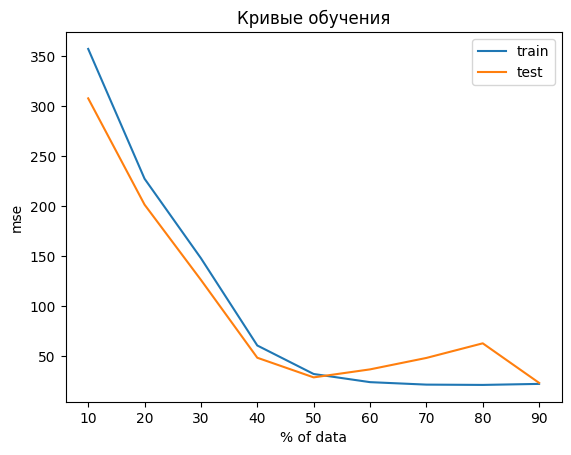

In [104]:
plt.plot(
    range(10, 100, 10),
    train_score, label='train'
)
plt.plot(
    range(10, 100, 10),
    test_score, label='test'
)
plt.xlabel('% of data')
plt.ylabel('mse')
plt.title('Кривые обучения')
plt.legend()